In [1]:
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.manifold import TSNE
import plotly.express as px
# from yellowbrick.text import TSNEVisualizer
import plotly.express as px
from sklearn.decomposition import PCA


读入数据

In [2]:

file_path = './dataset20220613.xlsx'
df = pd.read_excel(file_path)

## 观察数据

查看数据集多少行多少列

In [3]:
df.shape

(1606, 89)

查看数据集每一列的统计值(均值方差中位数最大最小值...)

In [4]:
df.describe()

,Filnum,IDps,condition,Y,ltV,leV,trV,leS,trS,leT,...,Unnamed: 79,"trP(1,:)",Unnamed: 81,Unnamed: 82,"trP(2,:)",Unnamed: 84,Unnamed: 85,"trP(3,:)",Unnamed: 87,Unnamed: 88
count,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,...,1606.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1603.000000,1605.000000,1605.000000,1605.000000
mean,47.805106,0.586190,6.444583,1.420299,-3.602838,11.048121,10.452654,1239.980590,1259.292850,113.024907,...,-0.005770,-0.000376,-0.004820,-0.000402,0.000647,0.006426,-0.002721,0.000122,0.000099,0.000241
std,27.738162,0.343845,3.458753,0.493761,0.493052,1.069392,1.305388,57.380577,65.441512,10.203994,...,0.008221,0.001076,0.009215,0.002726,0.002169,0.009718,0.010308,0.000075,0.001060,0.000490
min,1.000000,0.002123,1.000000,1.000000,-5.378385,0.730107,0.677853,40.886000,36.795000,56.000000,...,-0.037180,-0.005012,-0.086864,-0.021300,-0.019435,-0.056733,-0.028460,-0.000134,-0.007092,-0.005271
25%,24.000000,0.189829,3.000000,1.000000,-3.881620,10.386939,9.546243,1216.707250,1235.441500,106.000000,...,-0.009586,-0.000899,-0.007604,-0.001511,0.000205,0.000603,-0.010726,0.000069,-0.000369,-0.000014
50%,48.000000,0.706795,6.000000,1.000000,-3.610828,10.997207,10.341909,1240.174000,1257.115000,113.000000,...,-0.001841,-0.000212,-0.003638,-0.000305,0.000527,0.004573,-0.000968,0.000132,0.000153,0.000060
75%,72.000000,0.931663,9.000000,2.000000,-3.318524,11.694295,11.406842,1261.705000,1287.585500,119.000000,...,0.000107,0.000289,-0.000642,0.000580,0.001078,0.010722,0.002259,0.000174,0.000658,0.000437
max,96.000000,1.076975,12.000000,2.000000,5.395248,14.565953,19.425290,1373.396800,1385.699000,145.000000,...,0.005016,0.004912,0.057088,0.021492,0.073405,0.054624,0.087027,0.000539,0.006317,0.007210


抽出5条数据观察一下

In [5]:
df.sample(5)

,Filnum,IDps,condition,Y,ltV,leV,trV,leS,trS,leT,...,Unnamed: 79,"trP(1,:)",Unnamed: 81,Unnamed: 82,"trP(2,:)",Unnamed: 84,Unnamed: 85,"trP(3,:)",Unnamed: 87,Unnamed: 88
1062,62,0.160599,8,2,-3.832798,11.556807,10.092926,1259.692,1221.244,109,...,0.001269,-0.001240,-0.044935,0.007275,0.001874,0.003376,-0.001621,0.000164,0.001087,0.000100
841,50,0.459744,7,1,-3.282351,10.039780,9.543188,1234.893,1269.244,123,...,-0.001884,-0.000850,-0.006118,-0.001817,0.000519,0.001990,0.003921,0.000133,0.000097,0.000014
1500,93,0.788020,12,1,-3.144124,10.193900,9.089037,1223.268,1227.020,120,...,0.000386,-0.000700,-0.003237,-0.001206,-0.000102,-0.009029,0.022155,0.000203,-0.000313,0.000004
420,31,0.973684,4,1,-3.801855,11.559018,11.485418,1259.933,1263.396,109,...,-0.018713,-0.000449,-0.004653,-0.000027,0.000493,0.015116,-0.015731,0.000138,-0.000356,0.000277
361,19,0.837447,3,2,-3.492950,10.395094,10.089400,1216.226,1210.728,117,...,-0.017672,0.000527,-0.006770,-0.000342,0.000440,0.000576,0.001158,-0.000018,-0.000127,0.000764


判断数据里面是否有缺失值

In [6]:

df.isnull().values.any()

True

发现有缺失值，计算总共有多少个缺失值

In [7]:
df.isnull().values.sum()

531

存在531个缺失值，删除这些缺失值

In [8]:
df.dropna(inplace=True)

查看删除后数据的维度

In [9]:
df.shape

(1528, 89)

## 开始聚类

将'ltV', 'leV', 'trV', 'leS', 'trS','leT', 'trT', 'leToeUi', 'leswpht', 'trToeUi', 'trswpht'等用来构建ipds的数据进行聚类

仅IDps，一维jenks_breaks GVF曲线（4-5类）

IDps + 现有聚类列

IDPS + 'ltV', 'leV', 'trV'


In [10]:
X_ltV2trs= df[['ltV', 'leV', 'trV', 'leS', 'trS','leT', 'trT', 'leToeUi', 'leswpht', 'trToeUi', 'trswpht']]
X_IDps = df[['IDps']]
X_IDps_ltV2trs = df[['IDps', 'ltV', 'leV', 'trV', 'leS', 'trS','leT', 'trT', 'leToeUi', 'leswpht', 'trToeUi', 'trswpht']]
X_IDps_ltV2trV = df[['IDps', 'ltV', 'leV', 'trV']]
print(X_ltV2trs.shape)
print(X_IDps.shape)
print(X_IDps_ltV2trs.shape)
print(X_IDps_ltV2trV.shape)

(1528, 11)
(1528, 1)
(1528, 12)
(1528, 4)


聚类前，统一尺度，全部数据放缩到区间0-1

In [11]:
X_ltV2trs = np.array(X_ltV2trs)
X_IDps = np.array(X_IDps)
X_IDps_ltV2trs = np.array(X_IDps_ltV2trs)
X_IDps_ltV2trV = np.array(X_IDps_ltV2trV)
scaler = MinMaxScaler()
X_ltV2trs = scaler.fit_transform(X_ltV2trs)
X_IDps = scaler.fit_transform(X_IDps)
X_IDps_ltV2trs = scaler.fit_transform(X_IDps_ltV2trs)
X_IDps_ltV2trV = scaler.fit_transform(X_IDps_ltV2trV)

## 先使用降维算法观察数据适合聚多少类

### 首先将画图方法写成函数方便后面调用

In [13]:
#画出t-SNE图,针对分类前的数据
def plot_data_tsne_nolabel(X):
    tmpdata = pd.DataFrame(X)
    # tmpdata['label'] = y
    tsne = TSNE(n_components=3, random_state=0)
    projections = tsne.fit_transform(X)
    fig = px.scatter_3d(
        projections, x=0, y=1, z=2,
        # color=tmpdata.label, labels={'color': 'label'}
    )
    fig.update_traces(marker_size=8)
    fig.show()

#画出PCA降维的3d图,针对分类前的数据
def plot_data_pca_nolabel(X):
    tmpdata = pd.DataFrame(X)
    pca = PCA(n_components=3)
    components = pca.fit_transform(tmpdata)
    total_var = pca.explained_variance_ratio_.sum() * 100
    fig = px.scatter_3d(
        components, x=0, y=1, z=2,
        # title=f'Total Explained Variance: {total_var:.2f}%',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
    )
    fig.show()

#画出tSNE图,针对分类后的数据
def plot_data_tsne_label(X, y):
    tmpdata = pd.DataFrame(X)
    tmpdata['label'] = y
    tsne = TSNE(n_components=3, random_state=0)
    projections = tsne.fit_transform(X)
    fig = px.scatter_3d(
        projections, x=0, y=1, z=2,
        color=tmpdata.label, labels={'color': 'label'}
    )
    fig.update_traces(marker_size=8)
    fig.show()




### 使用t-SNE观察数据

In [14]:
plot_data_tsne_nolabel(X_ltV2trs)

d:\AnaConda\envs\sklearn\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\AnaConda\envs\sklearn\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [15]:
plot_data_tsne_nolabel(X_IDps_ltV2trs)

d:\AnaConda\envs\sklearn\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

d:\AnaConda\envs\sklearn\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [16]:
plot_data_tsne_nolabel(X_IDps_ltV2trV)

d:\AnaConda\envs\sklearn\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

d:\AnaConda\envs\sklearn\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



### 使用PCA观察数据

In [17]:
plot_data_pca_nolabel(X_ltV2trs)

In [19]:
plot_data_pca_nolabel(X_IDps_ltV2trs)

这两个算法可视化的结果，pca的结果表明适合聚成6类，而t-sne的结果表明适合聚成7类

In [20]:
plot_data_pca_nolabel(X_IDps_ltV2trV)

### 选择聚类方法

其实聚类方法不重要，通用的k-means就可以聚出想要的结果，关键在于确定聚类的数目

确定方法有：

1.  Elbow Method

2. Silhouette Method

3. Davies-Bouldin Index

4.  Calinski-Harabasz Index

5. GVF曲线
 


    1. Elbow Method

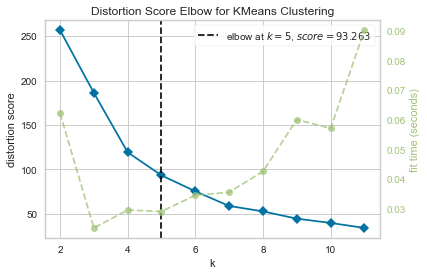

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=True)
visualizer.fit(X_ltV2trs)        # Fit the data to the visualizer
visualizer.show()   

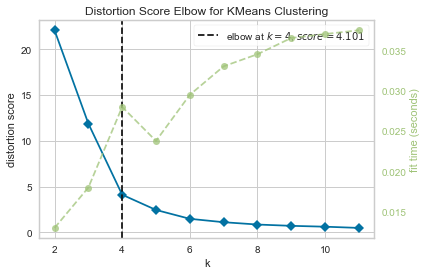

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=True)
visualizer.fit(X_IDps)        # Fit the data to the visualizer
visualizer.show()   

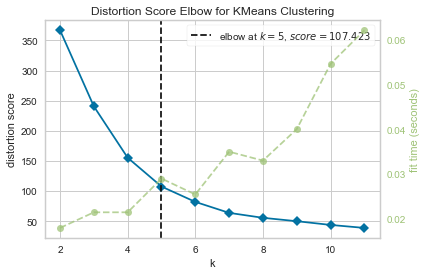

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=True)
visualizer.fit(X_IDps_ltV2trs)        # Fit the data to the visualizer
visualizer.show()   

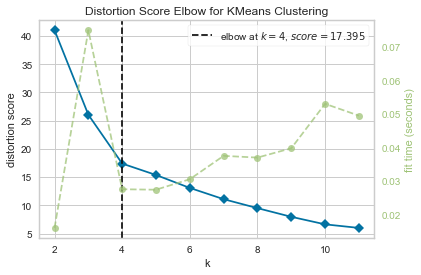

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=True)
visualizer.fit(X_IDps_ltV2trV)        # Fit the data to the visualizer
visualizer.show()   

    2. Silhouette Method

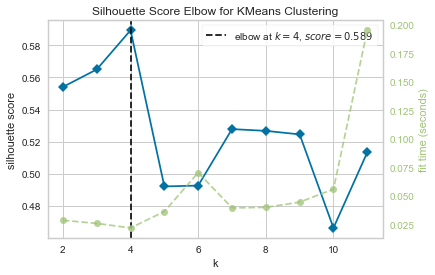

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [17]:
model = KMeans(4)
visualizer = KElbowVisualizer(model, k=(2,12),metric='silhouette', timings= True)
visualizer.fit(X_ltV2trs) 
visualizer.show()   

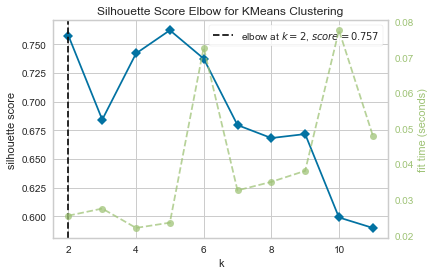

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [19]:
model = KMeans(4)
visualizer = KElbowVisualizer(model, k=(2,12),metric='silhouette', timings= True)
visualizer.fit(X_IDps)
visualizer.show()  

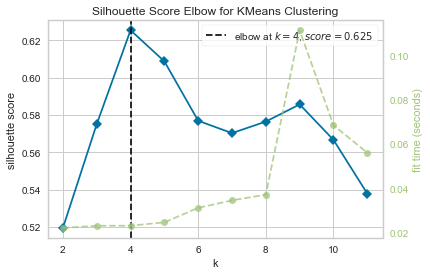

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [20]:
model = KMeans(4)
visualizer = KElbowVisualizer(model, k=(2,12),metric='silhouette', timings= True)
visualizer.fit(X_IDps_ltV2trs)
visualizer.show()  

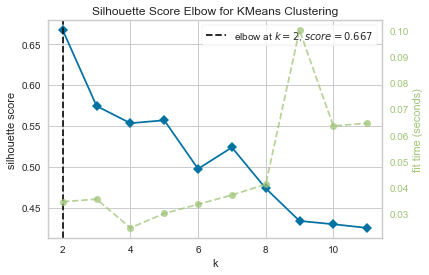

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [21]:
model = KMeans(4)
visualizer = KElbowVisualizer(model, k=(2,12),metric='silhouette', timings= True)
visualizer.fit(X_IDps_ltV2trV)
visualizer.show()  

    3. Calinski-Harabasz Index

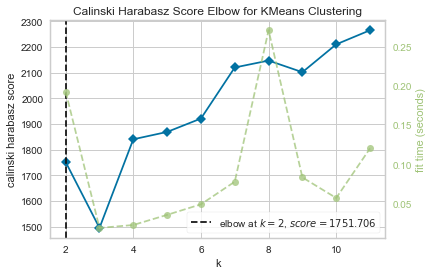

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [39]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,12),metric='calinski_harabasz', timings= True)
visualizer.fit(X_ltV2trs)        # Fit the data to the visualizer
visualizer.show() 

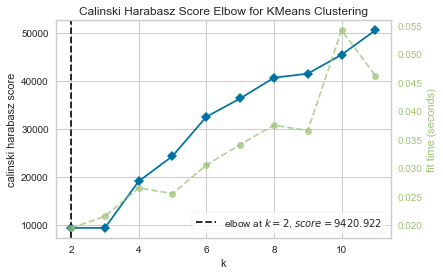

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [40]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,12),metric='calinski_harabasz', timings= True)
visualizer.fit(X_IDps)        # Fit the data to the visualizer
visualizer.show() 

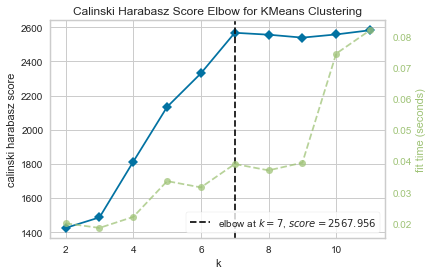

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [41]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,12),metric='calinski_harabasz', timings= True)
visualizer.fit(X_IDps_ltV2trs)        # Fit the data to the visualizer
visualizer.show() 

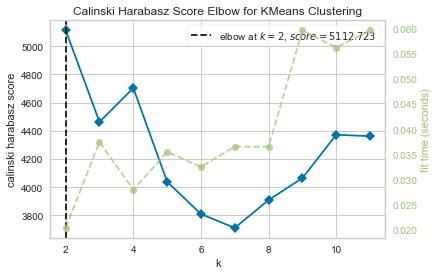

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [42]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,12),metric='calinski_harabasz', timings= True)
visualizer.fit(X_IDps_ltV2trV)        # Fit the data to the visualizer
visualizer.show() 

### 使用聚类算法




sklearn的聚类算法库中的聚类算法分为两种

详情可以查看链接：https://scikit-learn.org/stable/modules/clustering.html


一、需要提前指定聚的簇的数量的：

    1. kmeans

    2. Ward hierarchical clustering

二、不需要提前指定聚的簇的数量的：

    1. Affinity propagation

    2. Mean-shift
    
    3. DBSCAN

In [18]:
#k-means
#可调参数init：‘k-means++’, ‘random’}
kmeans = KMeans(n_clusters=4, init='k-means++').fit(X_IDps_ltV2trs)
y=kmeans.labels_
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)


#Ward hierarchical clustering
##可调参数linkage: {‘ward’, ‘complete’, ‘average’,‘single’}, optional (default ward)
# ward = AgglomerativeClustering(n_clusters=4, linkage="ward").fit(X_ltV2trs)
# y = ward.labels_
# unique, counts = np.unique(y, return_counts=True)
# print(np.asarray((unique, counts)).T)

# # 使用Affinity propagation
# #可调参数damping, preference
# af = AffinityPropagation(damping=0.5, preference=None).fit(X_scaled)
# cluster_centers_indices = af.cluster_centers_indices_
# y = af.labels_
# n_clusters_ = len(cluster_centers_indices)
# unique, counts = np.unique(y, return_counts=True)
# print(np.asarray((unique, counts)).T)

# #Mean-shift
# #可调参数 quantile
# bandwidth = estimate_bandwidth(X_scaled, quantile=0.3)
# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# ms.fit(X_scaled)
# y = ms.labels_
# unique, counts = np.unique(y, return_counts=True)
# print(np.asarray((unique, counts)).T)

# #DBSCAN
# #可调参数eps, min_samples
# db = DBSCAN(eps=0.4, min_samples=20).fit(X_scaled)
# y = db.labels_
# unique, counts = np.unique(y, return_counts=True)
# print(np.asarray((unique, counts)).T)


[[  0 473]
 [  1 262]
 [  2 157]
 [  3  95]
 [  4 136]
 [  5 151]
 [  6 254]]


可视化kmeans聚类的结果。

### 使用t-SNE降维算法可视化

In [19]:
plot_data_tsne_label(X_IDps_ltV2trs, y)

d:\AnaConda\envs\sklearn\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

d:\AnaConda\envs\sklearn\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



## 总结

我分析的结果决定采用kmeans聚类的结果。

In [44]:
kmeans = KMeans(n_clusters=4,init='k-means++').fit(X_ltV2trs)
y=kmeans.labels_

得到分类的结果，加入到原数据最后一行

In [21]:
df['label'] = y

In [22]:
df.shape

(1528, 90)

可以看到数据从89列转换为了90列，保存到新的文件中供后续数据预处理分类等使用

In [32]:
df.to_excel('./dataset20220613_label.xlsx', index=False)

## 额外对比

如果使用idps聚类，结果会有什么不同

In [26]:
kmeans = KMeans(n_clusters=7, init='k-means++').fit(X_IDps)
y_IDps=kmeans.labels_
unique, counts = np.unique(y_IDps, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 168]
 [  1 233]
 [  2 395]
 [  3 166]
 [  4  96]
 [  5 231]
 [  6 239]]


将idps的分类结果和之前的11列数据的t-sne图联系起来，可以看看是什么样

In [27]:
plot_data_tsne_label(X_IDps, y_IDps)

d:\AnaConda\envs\sklearn\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

d:\AnaConda\envs\sklearn\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [47]:
df['label_IDps'] = y_IDps

## 画出condition列和预测的两个label的关系图



对角线是分布图，其余为散点图

可以看到condition在1-12都有被平均划分为1-4类，因此两者关系不大

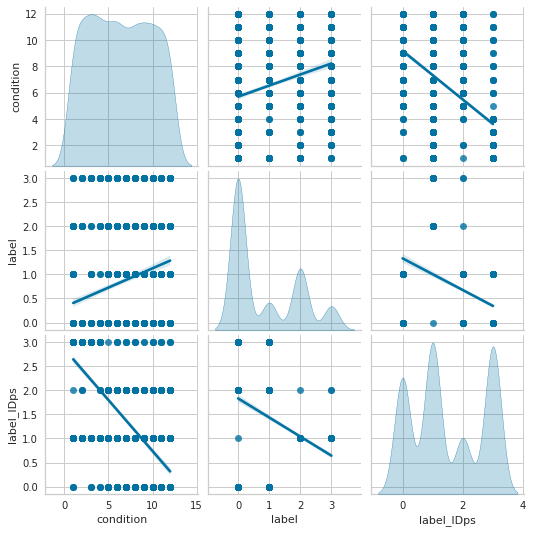

In [48]:

sns.pairplot(df[['condition','label','label_IDps']],kind='reg',diag_kind='kde')

## jenks_breaks 聚类

In [28]:
# from jenkspy import JenksNaturalBreaks
# jnb = JenksNaturalBreaks(nb_class=7)
# jnb.fit(X_IDps)
# print(jnb.labels_)
# print(len(jnb.groups_))
# print(jnb.inner_breaks_)

d:\AnaConda\envs\sklearn\lib\site-packages\jenkspy\core.py:103: UserWarning:

Invalid values encountered (NaN or Inf) were ignored



In [22]:
from jenkspy import jenks_breaks
import numpy as np
 
 
def goodness_of_variance_fit(array, classes):
    # get the break points
    classes = jenks_breaks(array, classes)
 
    # do the actual classification
    classified = np.array([classify(i, classes) for i in array])
 
    # max value of zones
    maxz = max(classified)
 
    # nested list of zone indices
    zone_indices = [[idx for idx, val in enumerate(classified) if zone + 1 == val] for zone in range(maxz)]
 
    # sum of squared deviations from array mean
    sdam = np.sum((array - array.mean()) ** 2)
 
    # sorted polygon stats
    array_sort = [np.array([array[index] for index in zone]) for zone in zone_indices]
 
    # sum of squared deviations of class means
    sdcm = sum([np.sum((classified - classified.mean()) ** 2) for classified in array_sort])
 
    # goodness of variance fit
    gvf = (sdam - sdcm) / sdam
 
    return gvf
 
 
def classify(value, breaks):
    for i in range(1, len(breaks)):
        if value < breaks[i]:
            return i
    return len(breaks) - 1
 


In [38]:
import plotly.express as px
array = X_IDps
gvfs = []
classes = range(2,12)
for nclasses  in classes:
    # while gvf < .8:
    gvf = goodness_of_variance_fit(array, nclasses)
    # print(nclasses, gvf)
    gvfs.append(gvf)

fig = px.line( x=list(classes), y=gvfs, title='Goodness of Variance Fit: X = classes, Y = gvf')
fig.show()

d:\AnaConda\envs\sklearn\lib\site-packages\jenkspy\core.py:103: UserWarning:

Invalid values encountered (NaN or Inf) were ignored

